
<a href="https://colab.research.google.com/github/Argentan/DMA_LAB2/blob/master/tutoriales/03_manejo_de_datos-pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Pandas - Continuación

## Combinando Data Frames

In [1]:
import numpy as np
import pandas as pd

### Append

In [2]:
Nombres = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro


In [ ]:
Nombres2 = pd.DataFrame({'id':[5,6], 'Nombre': ["Julia", "Alberto"]})
Nombres2

In [ ]:
Nombres.append(Nombres2)

### Merge

#### Por una columna

In [3]:
Nombres = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro


In [4]:
Edad = pd.DataFrame({'id':[1,2,3,4], 'Edad':[11,21,8,15]})
Edad

,id,Edad
0,1,11
1,2,21
2,3,8
3,4,15


In [5]:
pd.merge(Nombres, Edad)

,id,Nombre,Edad
0,1,Ana,11
1,2,Juan,21
2,3,Carolina,8
3,4,Pedro,15


#### Especificando columna comun

In [6]:
Nombres = pd.DataFrame({'id_Nombres':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Edad = pd.DataFrame({'id_edades':[1,2,3,4], 'Edad':[11,21,8,15]})

In [7]:
pd.merge(Nombres, Edad, left_on='id_Nombres', right_on='id_edades')

,id_Nombres,Nombre,id_edades,Edad
0,1,Ana,1,11
1,2,Juan,2,21
2,3,Carolina,3,8
3,4,Pedro,4,15


### How (inner, outer, left, right,...)

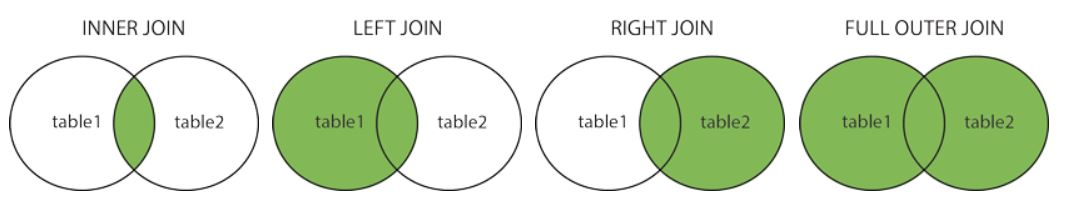

In [8]:
Nombres = pd.DataFrame({'id':[3,4,5,6], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Edad = pd.DataFrame({'id':[1,2,3,4], 'Edad':[11,21,8,15]})

In [9]:
pd.merge(Nombres, Edad, how='inner')

,id,Nombre,Edad
0,3,Ana,8
1,4,Juan,15


In [10]:
pd.merge(Nombres, Edad, how='outer')

,id,Nombre,Edad
0,3,Ana,8.0
1,4,Juan,15.0
2,5,Carolina,NaN
3,6,Pedro,NaN
4,1,NaN,11.0
5,2,NaN,21.0


In [11]:
pd.merge(Nombres, Edad, how='left')

,id,Nombre,Edad
0,3,Ana,8.0
1,4,Juan,15.0
2,5,Carolina,NaN
3,6,Pedro,NaN


In [ ]:
pd.merge(Nombres, Edad, how='right')

In [13]:
Nombres.join(Edad, on="id", rsuffix="_edad")

,id,Nombre,id_edad,Edad
0,3,Ana,4.0,15.0
1,4,Juan,NaN,NaN
2,5,Carolina,NaN,NaN
3,6,Pedro,NaN,NaN


In [12]:
Nombres.join(Edad.set_index("id"), on="id")

,id,Nombre,Edad
0,3,Ana,8.0
1,4,Juan,15.0
2,5,Carolina,NaN
3,6,Pedro,NaN


## Agrupaciones



In [16]:
data = pd.read_csv("/home/marifra/Documents/MaestriaAustral/Labo_II/DMA_LAB2/data/titanic.csv", index_col="PassengerId")

In [17]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Puedo usar un agrupador por Columna

In [ ]:
data['Survived'].sum()

In [ ]:
data['Age'].mean()

Y también puedo agrupar por fila, por ejemplo, para construir otra columna

In [24]:
d = data['NumFam'] = data[['SibSp', 'Parch']].sum(axis=1)
# data[['SibSp', 'Parch','NumFam']].head(10)
d

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    3
890    0
891    0
Length: 891, dtype: int64


### Group By

Las agrupaciones sirven para hacer cálculos sobre subconjuntos de los datos, generalmente tienen tres partes:

1. Definir los grupos
2. Aplicar un cálculo
3. Combinar los resultados

In [ ]:
agrupado = data.groupby(["Pclass", "Sex"])
agrupado

In [ ]:
agrupado.Survived.mean()

In [ ]:
agrupado.Survived.agg(
    media="mean",
    media_2= np.mean,
    varianza= "var",
    cantidad= "count",
    cant2= len
)

In [ ]:
data.groupby("Survived")[['Age', 'SibSp', 'Parch', 'NumFam', 'Fare']].mean()

### Tablas de contingencia

Las tablas de contingencia asemejan las tablas dinámicas de excel, sirven apra ver inteacciones entre variables



In [ ]:
pd.crosstab(data.Age.isnull(), data.Survived)

In [ ]:
pd.crosstab(data.Age.isnull(), data.Survived).apply(lambda x: x/x.sum(), axis=0)

In [ ]:
pd.crosstab(data.Pclass, data.Survived, values=data.Fare, aggfunc=np.mean)

In [ ]:
pd.crosstab(pd.qcut(data.Age, 10), data.Sex, values=data.Survived, aggfunc=np.mean)

In [ ]:
pd.crosstab(pd.cut(data.Age, range(0, 100, 10)), data.Sex, values=data.Survived, aggfunc=np.mean)

## Graficación Simple con plot()

In [ ]:
data.sort_values('Age').plot(x = 'Age', y = 'Fare')

In [ ]:
pd.crosstab(pd.cut(data.Age, range(0, 100, 10)), data.Sex, values=data.Survived, aggfunc=np.mean).plot(kind = 'bar')

## Ejercicios

### Combinación de Objetos

Crear los siguientes objetos:

In [18]:
Nombres_1 = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres_2 = pd.DataFrame({'id':[5,6,7,8], 'Nombre': ["Martin", "Lucas", "Julieta", "Pablo"]})
Edad_1 = pd.DataFrame({'id_edades':[3,4,5,6], 'Edad':[11,21,8,15]})

Concatenar los objetos Nombres_1 y Nombres_2 en un objeto llamado Nombres_3

In [20]:
# Nombres.append(Nombres2)

Nombres_3 = Nombres_1.append(Nombres_2)
Nombres_3

/tmp/ipykernel_7394/3697700641.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Nombres_3 = Nombres_1.append(Nombres_2)


,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro
0,5,Martin
1,6,Lucas
2,7,Julieta
3,8,Pablo


Hacer un Merge de Nombre_3 y Edad_1, quedandonos solo con las filas que coincidan

In [27]:
pd.merge(Nombres_3, Edad_1, left_on= 'id', right_on = 'id_edades', how='inner')


,id,Nombre,id_edades,Edad
0,3,Carolina,3,11
1,4,Pedro,4,21
2,5,Martin,5,8
3,6,Lucas,6,15


Hacer un Merge de Nombre_3 y Edad_1, quedandonos solo con todas las filas de Nombre_3

In [28]:
#pd.merge(Nombres, Edad, how='left')
pd.merge(Nombres_3, Edad_1, left_on= 'id', right_on = 'id_edades', how='left')

,id,Nombre,id_edades,Edad
0,1,Ana,NaN,NaN
1,2,Juan,NaN,NaN
2,3,Carolina,3.0,11.0
3,4,Pedro,4.0,21.0
4,5,Martin,5.0,8.0
5,6,Lucas,6.0,15.0
6,7,Julieta,NaN,NaN
7,8,Pablo,NaN,NaN


### Agrupaciones

¿Cuál es el precio promedio que se pagó por un Ticket? (Fare)


In [29]:
data['Fare'].mean()

32.204207968574636

¿Cuál es el precio promedio que se pagó en cada Categoría? (Pclass) 

In [33]:
data[['Fare','Pclass']].groupby("Pclass").mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


Construir una Tabla de Contingencia usando Genero (Sex) y Categoría (Pclass) para calcular el porcentaje de supervivencia

In [34]:
pd.crosstab(data.Sex, data.Pclass, values=data.Survived, aggfunc=np.mean)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Construir una Tabla de Contingencia usando el Genero y el precio de un Ticket en 5 rangos para calcular el porcentaje de supervivencia

In [37]:
pd.crosstab(pd.qcut(data.Fare, 5), data.Sex, values=data.Survived, aggfunc=np.mean)

Sex,female,male
Fare,,
"(-0.001, 7.854]",0.684211,0.092199
"(7.854, 10.5]",0.527778,0.121622
"(10.5, 21.679]",0.701299,0.200000
"(21.679, 39.688]",0.685714,0.290909
"(39.688, 512.329]",0.924731,0.325301


Graficar el porcentaje de supervivencia por Categoría y Género

<Axes: xlabel='Pclass'>

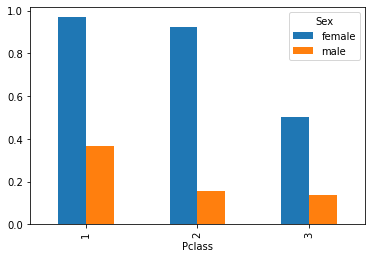

In [42]:
pd.crosstab(data.Pclass, data.Sex, values=data.Survived, aggfunc=np.mean).plot.bar()